In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [2]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [4]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5261 - accuracy: 0.7725 - val_loss: 0.3974 - val_accuracy: 0.8688
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3211 - accuracy: 0.9018 - val_loss: 0.3302 - val_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2392 - accuracy: 0.9248 - val_loss: 0.2834 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1886 - accuracy: 0.9409 - val_loss: 0.2806 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1561 - accuracy: 0.9521 - val_loss: 0.2760 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1302 - accuracy: 0.9606 - val_loss: 0.2943 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1084 - accuracy: 0.9695 - val_loss: 0.2971 - val_accuracy: 0.8840
Epoch 8/20
30

In [7]:
from keras import models
from keras import layers

model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))



Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6315 - accuracy: 0.6373 - val_loss: 0.5291 - val_accuracy: 0.8279
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5252 - accuracy: 0.7600 - val_loss: 0.4295 - val_accuracy: 0.8695
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4483 - accuracy: 0.8173 - val_loss: 0.3626 - val_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3898 - accuracy: 0.8547 - val_loss: 0.3194 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3412 - accuracy: 0.8791 - val_loss: 0.2940 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3055 - accuracy: 0.8957 - val_loss: 0.2796 - val_accuracy: 0.8928
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2680 - accuracy: 0.9157 - val_loss: 0.2989 - val_accuracy: 0.8823
Epoch 8/20
30

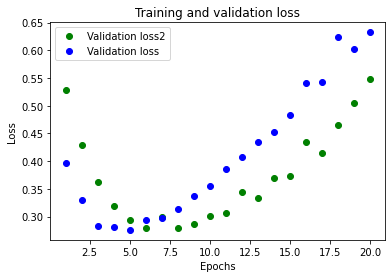

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
hist2_dict = history2.history

loss = hist2_dict['val_loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label='Validation loss2')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()